# Section 5 : Multispectral Remote Sensing Data in Python
## Chapter 9 : Landsat Exercises

[![Foo](https://www.colorado.edu/brand/sites/default/files/styles/medium/public/page/boulder-one-line_0.png)](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/)

Pour ce dernier notebook dédié spécifiquement aux données Landsat, quelques exercices s'imposent pour vérifier que les notions ont bien été assimilées. De façon assez simpliste, les deux prochaines questions concernent le recadrage et l'affichage d'un cliché satellite de Cold Springs différent de ceux que l'on a pu voir par le passé. Ce notebook vise donc à importer, recadrer et afficher une carte de Cold Springs avant les incendies de 2016.

In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping
import numpy as np
import numpy.ma as ma
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


In [3]:
def combine_tifs(tif_list):
    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
    return xr.concat(out_xr, dim="band") 

In [9]:
landsat_pre_fire_path = os.path.join("cold-springs-fire",
                                     "landsat_collect",
                                     "LC080340322016070701T1-SC20180214145604",
                                     "crop")

landsat_pre_fire_bands = glob(os.path.join(landsat_pre_fire_path,
                                           "*band*.tif"))
landsat_pre_fire_bands.sort()
landsat_pre_fire_bands

landsat_pre_xr = combine_tifs(landsat_pre_fire_bands)

In [11]:
# Open up boundary extent in GeoPandas
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# Reproject data to CRS of raster data
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_pre_xr.rio.crs)
# Clip the data 
landsat_pre_xr_clip = landsat_pre_xr.rio.clip(fire_boundary_utmz13.geometry.apply(mapping))

/home/vintel38/anaconda3/envs/ML_new/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


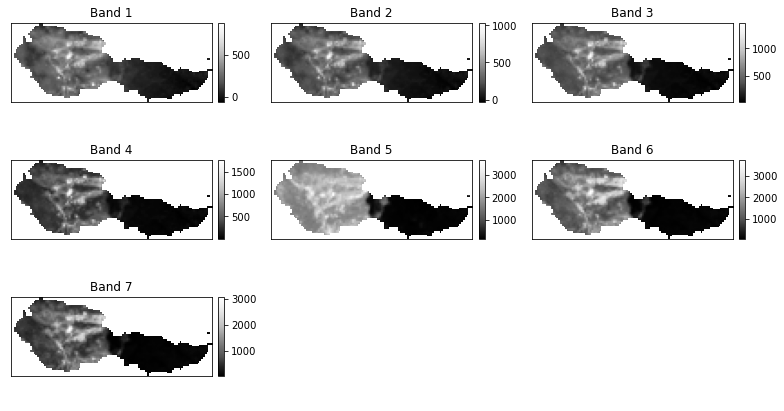

In [14]:
# Plot all bands using earthpy
band_titles = ["Band 1",
               "Band 2",
               "Band 3",
               "Band 4",
               "Band 5",
               "Band 6",
               "Band 7"]

ep.plot_bands(landsat_pre_xr_clip,
              figsize=(11, 6),
              title=band_titles,
              cbar=True)
plt.show()

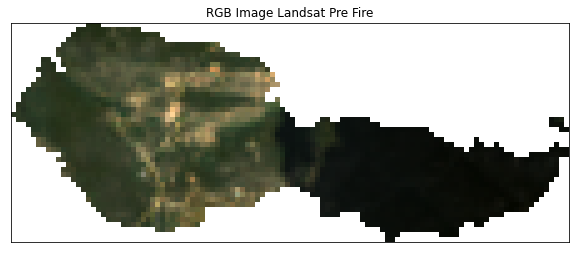

In [18]:
# Create nan mask
mask_nan = np.isnan(landsat_pre_xr_clip)

# Apply nan mask to cropped data
landsat_pre_arr_masked = ma.masked_array(landsat_pre_xr_clip,
                                          mask=mask_nan)

# Plot masked array
ep.plot_rgb(landsat_pre_arr_masked,
            rgb=[3, 2, 1],
            title="RGB Image Landsat Pre Fire")
plt.show()

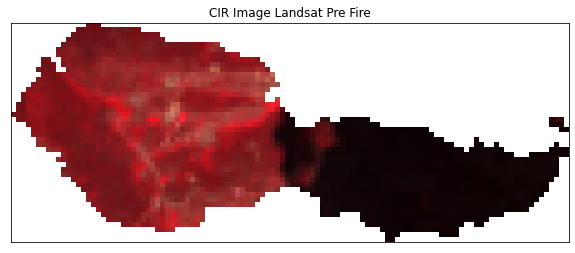

In [19]:
# Create nan mask
mask_nan = np.isnan(landsat_pre_xr_clip)

# Apply nan mask to cropped data
landsat_pre_arr_masked = ma.masked_array(landsat_pre_xr_clip,
                                          mask=mask_nan)

# Plot masked array
ep.plot_rgb(landsat_pre_arr_masked,
            rgb=[4, 3, 2],
            title="CIR Image Landsat Pre Fire")
plt.show()